In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
trans_df= pd.read_excel('transactions.xlsx',skiprows=1)
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [4]:
cust_address_df= pd.read_excel('CustomerAddress.xlsx',skiprows=1)
cust_address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [5]:
cust_demographic_df= pd.read_excel('CustomerDemographics.xlsx',skiprows=1)
cust_demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [6]:
new_custList_df= pd.read_excel('NewCustomerList.xlsx',skiprows=1)
new_custList_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.74,0.925,1.15625,0.982812,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.70,0.700,0.87500,0.743750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.44,0.440,0.44000,0.440000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.96,1.200,1.20000,1.200000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.70,0.700,0.87500,0.875000,4,4,1.703125


# Transaction data

In [7]:
trans_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   transaction_id           20000 non-null  int64         
 1   product_id               20000 non-null  int64         
 2   customer_id              20000 non-null  int64         
 3   transaction_date         20000 non-null  datetime64[ns]
 4   online_order             19640 non-null  float64       
 5   order_status             20000 non-null  object        
 6   brand                    19803 non-null  object        
 7   product_line             19803 non-null  object        
 8   product_class            19803 non-null  object        
 9   product_size             19803 non-null  object        
 10  list_price               20000 non-null  float64       
 11  standard_cost            19803 non-null  float64       
 12  product_first_sold_date  19803 n

In [8]:
trans_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order               360
order_status                 0
brand                      197
product_line               197
product_class              197
product_size               197
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [9]:
trans_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,19640.000000,20000.000000,19803.000000,19803.000000
mean,10000.500000,45.36465,1738.246050,0.500458,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.500013,582.825242,405.955660,2875.201110
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,1.000000,1163.890000,507.580000,38216.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [10]:
trans_df.columns

Index(['transaction_id', 'product_id', 'customer_id', 'transaction_date',
       'online_order', 'order_status', 'brand', 'product_line',
       'product_class', 'product_size', 'list_price', 'standard_cost',
       'product_first_sold_date'],
      dtype='object')

In [11]:
print(trans_df.online_order.unique())
print(trans_df.brand.unique())
print(trans_df.product_line.unique())
print(trans_df.product_class.unique())
print(trans_df.product_size.unique())

[ 0.  1. nan]
['Solex' 'Trek Bicycles' 'OHM Cycles' 'Norco Bicycles' 'Giant Bicycles'
 'WeareA2B' nan]
['Standard' 'Road' 'Mountain' 'Touring' nan]
['medium' 'low' 'high' nan]
['medium' 'large' 'small' nan]


In [12]:
trans_df.product_size.mode()[0]

'medium'

In [13]:
trans_df.product_class.fillna('medium',inplace=True)
trans_df.product_line.fillna('Standard',inplace=True)
trans_df.brand.fillna('others',inplace=True)
trans_df.product_size.fillna('medium',inplace=True)
trans_df.online_order.fillna(0,inplace=True)

trans_df.isnull().sum()

transaction_id               0
product_id                   0
customer_id                  0
transaction_date             0
online_order                 0
order_status                 0
brand                        0
product_line                 0
product_class                0
product_size                 0
list_price                   0
standard_cost              197
product_first_sold_date    197
dtype: int64

In [14]:
trans_df.standard_cost.mean()

556.0469512209312

In [15]:
trans_df.product_first_sold_date.mean()

38199.77654900773

In [16]:
trans_df.product_first_sold_date.fillna(trans_df.product_first_sold_date.mean(),inplace=True)
trans_df.standard_cost.fillna(trans_df.standard_cost.mean(),inplace=True)

In [17]:
trans_df.isnull().sum()

transaction_id             0
product_id                 0
customer_id                0
transaction_date           0
online_order               0
order_status               0
brand                      0
product_line               0
product_class              0
product_size               0
list_price                 0
standard_cost              0
product_first_sold_date    0
dtype: int64

In [18]:
trans_df.describe()

,transaction_id,product_id,customer_id,online_order,list_price,standard_cost,product_first_sold_date
count,20000.000000,20000.00000,20000.000000,20000.000000,20000.000000,20000.000000,20000.000000
mean,10000.500000,45.36465,1738.246050,0.491450,1107.829449,556.046951,38199.776549
std,5773.647028,30.75359,1011.951046,0.499939,582.825242,403.951280,2861.004990
min,1.000000,0.00000,1.000000,0.000000,12.010000,7.210000,33259.000000
25%,5000.750000,18.00000,857.750000,0.000000,575.270000,215.140000,35667.000000
50%,10000.500000,44.00000,1736.000000,0.000000,1163.890000,507.580000,38206.000000
75%,15000.250000,72.00000,2613.000000,1.000000,1635.300000,795.100000,40672.000000
max,20000.000000,100.00000,5034.000000,1.000000,2091.470000,1759.850000,42710.000000


In [19]:
trans_df.head()

,transaction_id,product_id,customer_id,transaction_date,online_order,order_status,brand,product_line,product_class,product_size,list_price,standard_cost,product_first_sold_date
0,1,2,2950,2017-02-25,0.0,Approved,Solex,Standard,medium,medium,71.49,53.62,41245.0
1,2,3,3120,2017-05-21,1.0,Approved,Trek Bicycles,Standard,medium,large,2091.47,388.92,41701.0
2,3,37,402,2017-10-16,0.0,Approved,OHM Cycles,Standard,low,medium,1793.43,248.82,36361.0
3,4,88,3135,2017-08-31,0.0,Approved,Norco Bicycles,Standard,medium,medium,1198.46,381.10,36145.0
4,5,78,787,2017-10-01,1.0,Approved,Giant Bicycles,Standard,medium,large,1765.30,709.48,42226.0


In [20]:
trans_df.order_status.value_counts()

Approved     19821
Cancelled      179
Name: order_status, dtype: int64

In [21]:
trans_df.brand.value_counts()

Solex             4253
Giant Bicycles    3312
WeareA2B          3295
OHM Cycles        3043
Trek Bicycles     2990
Norco Bicycles    2910
others             197
Name: brand, dtype: int64

In [22]:
trans_df.product_line.value_counts()

Standard    14373
Road         3970
Touring      1234
Mountain      423
Name: product_line, dtype: int64

In [23]:
trans_df.product_class.value_counts()

medium    14023
high       3013
low        2964
Name: product_class, dtype: int64

In [24]:
trans_df.product_size.value_counts()

medium    13187
large      3976
small      2837
Name: product_size, dtype: int64

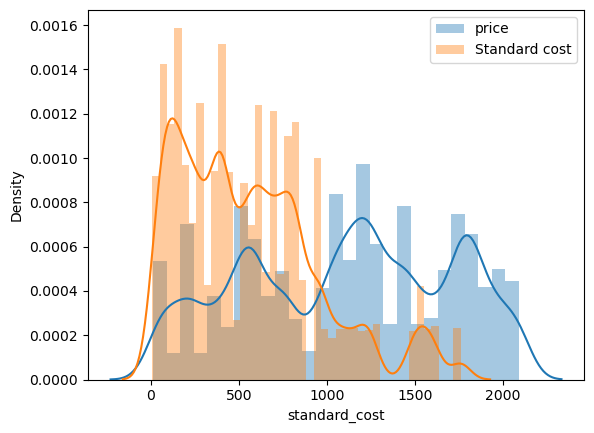

In [25]:
sns.distplot(trans_df.list_price,label='price')
sns.distplot(trans_df.standard_cost,label='Standard cost')
plt.legend()
plt.show()

In [26]:
trans_df['transaction_date'].min()

Timestamp('2017-01-01 00:00:00')

In [27]:
trans_df['transaction_date'].max()

Timestamp('2017-12-30 00:00:00')

In [28]:
trans_df.to_csv('transaction_cleaned.csv',index=False)

# Customer Demographic data

In [29]:
cust_demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,default,owns_car,tenure
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,"""'",Yes,11.0
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,<script>alert('hi')</script>,Yes,16.0
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,2018-02-01 00:00:00,Yes,15.0
3,4,Talbot,NaN,Male,33,1961-10-03,NaN,IT,Mass Customer,N,() { _; } >_[$($())] { touch /tmp/blns.shellsh...,No,7.0
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,NaN,Affluent Customer,N,NIL,Yes,8.0


In [30]:
cust_demographic_df.DOB.dtype

dtype('<M8[ns]')

In [31]:
cust_demographic_df.drop(['default'],axis=1,inplace=True)
cust_demographic_df.job_title.fillna('others',inplace=True)
cust_demographic_df.job_industry_category.fillna('others',inplace=True)

In [32]:
cust_demographic_df.isnull().sum()

customer_id                              0
first_name                               0
last_name                              125
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     87
job_title                                0
job_industry_category                    0
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                  87
dtype: int64

In [33]:
print(cust_demographic_df.deceased_indicator.unique())
print(cust_demographic_df.job_industry_category.unique())
print()
print(cust_demographic_df.job_title.unique())


['N' 'Y']
['Health' 'Financial Services' 'Property' 'IT' 'others' 'Retail'
 'Argiculture' 'Manufacturing' 'Telecommunications' 'Entertainment']

['Executive Secretary' 'Administrative Officer' 'Recruiting Manager'
 'others' 'Senior Editor' 'Media Manager I'
 'Business Systems Development Analyst' 'Senior Quality Engineer'
 'Nuclear Power Engineer' 'Developer I' 'Account Executive'
 'Junior Executive' 'Media Manager IV' 'Sales Associate' 'Professor'
 'Geological Engineer' 'Project Manager' 'Safety Technician I'
 'Research Assistant I' 'Accounting Assistant III' 'Editor'
 'Research Nurse' 'Safety Technician III' 'Staff Accountant III'
 'Legal Assistant' 'Product Engineer' 'Information Systems Manager'
 'VP Quality Control' 'Social Worker' 'Senior Cost Accountant'
 'Assistant Media Planner' 'Payment Adjustment Coordinator' 'Food Chemist'
 'Accountant III' 'Director of Sales' 'Senior Financial Analyst'
 'Registered Nurse' 'Biostatistician II' 'Computer Systems Analyst II'
 'Software Test E

In [34]:
cust_demographic_df['last_name'].fillna(' ',inplace= True)

In [35]:
cust_demographic_df['Full name']= (cust_demographic_df['first_name']+ ' '+cust_demographic_df['last_name'])
cust_demographic_df.head()

,customer_id,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,Full name
0,1,Laraine,Medendorp,F,93,1953-10-12,Executive Secretary,Health,Mass Customer,N,Yes,11.0,Laraine Medendorp
1,2,Eli,Bockman,Male,81,1980-12-16,Administrative Officer,Financial Services,Mass Customer,N,Yes,16.0,Eli Bockman
2,3,Arlin,Dearle,Male,61,1954-01-20,Recruiting Manager,Property,Mass Customer,N,Yes,15.0,Arlin Dearle
3,4,Talbot,,Male,33,1961-10-03,others,IT,Mass Customer,N,No,7.0,Talbot
4,5,Sheila-kathryn,Calton,Female,56,1977-05-13,Senior Editor,others,Affluent Customer,N,Yes,8.0,Sheila-kathryn Calton


In [36]:
cust_demographic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 13 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   customer_id                          4000 non-null   int64         
 1   first_name                           4000 non-null   object        
 2   last_name                            4000 non-null   object        
 3   gender                               4000 non-null   object        
 4   past_3_years_bike_related_purchases  4000 non-null   int64         
 5   DOB                                  3913 non-null   datetime64[ns]
 6   job_title                            4000 non-null   object        
 7   job_industry_category                4000 non-null   object        
 8   wealth_segment                       4000 non-null   object        
 9   deceased_indicator                   4000 non-null   object        
 10  owns_car    

In [37]:
sorted(list(cust_demographic_df.job_title.unique()))

['Account Coordinator',
 'Account Executive',
 'Account Representative I',
 'Account Representative II',
 'Account Representative III',
 'Account Representative IV',
 'Accountant I',
 'Accountant II',
 'Accountant III',
 'Accountant IV',
 'Accounting Assistant I',
 'Accounting Assistant II',
 'Accounting Assistant III',
 'Accounting Assistant IV',
 'Actuary',
 'Administrative Assistant I',
 'Administrative Assistant II',
 'Administrative Assistant III',
 'Administrative Assistant IV',
 'Administrative Officer',
 'Analog Circuit Design manager',
 'Analyst Programmer',
 'Assistant Manager',
 'Assistant Media Planner',
 'Assistant Professor',
 'Associate Professor',
 'Automation Specialist I',
 'Automation Specialist II',
 'Automation Specialist III',
 'Automation Specialist IV',
 'Biostatistician I',
 'Biostatistician II',
 'Biostatistician III',
 'Biostatistician IV',
 'Budget/Accounting Analyst I',
 'Budget/Accounting Analyst II',
 'Budget/Accounting Analyst III',
 'Budget/Accounting A

In [38]:
cust_demographic_df.DOB.unique()

array(['1953-10-12T00:00:00.000000000', '1980-12-16T00:00:00.000000000',
       '1954-01-20T00:00:00.000000000', ...,
       '1975-12-12T00:00:00.000000000', '2001-07-13T00:00:00.000000000',
       '1991-11-05T00:00:00.000000000'], dtype='datetime64[ns]')

In [39]:
cust_demographic_df.to_csv('cust_demo.csv',index=False)

# Customer Address data

In [40]:
cust_address_df.head()

,customer_id,address,postcode,state,country,property_valuation
0,1,060 Morning Avenue,2016,New South Wales,Australia,10
1,2,6 Meadow Vale Court,2153,New South Wales,Australia,10
2,4,0 Holy Cross Court,4211,QLD,Australia,9
3,5,17979 Del Mar Point,2448,New South Wales,Australia,4
4,6,9 Oakridge Court,3216,VIC,Australia,9


In [41]:
cust_address_df.isnull().sum()

customer_id           0
address               0
postcode              0
state                 0
country               0
property_valuation    0
dtype: int64

In [42]:
cust_address_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   customer_id         3999 non-null   int64 
 1   address             3999 non-null   object
 2   postcode            3999 non-null   int64 
 3   state               3999 non-null   object
 4   country             3999 non-null   object
 5   property_valuation  3999 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 187.6+ KB


In [43]:
cust_address_df.country.value_counts()

Australia    3999
Name: country, dtype: int64

In [44]:
cust_address_df.property_valuation.value_counts().sort_values(ascending= False)

9     647
8     646
10    577
7     493
11    281
6     238
5     225
4     214
12    195
3     186
1     154
2     143
Name: property_valuation, dtype: int64

# NewCustomerList data

In [45]:
new_custList_df.head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,...,state,country,property_valuation,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Rank,Value
0,Chickie,Brister,Male,86,1957-07-12,General Manager,Manufacturing,Mass Customer,N,Yes,...,QLD,Australia,6,0.74,0.925,1.15625,0.982812,1,1,1.718750
1,Morly,Genery,Male,69,1970-03-22,Structural Engineer,Property,Mass Customer,N,No,...,NSW,Australia,11,0.70,0.700,0.87500,0.743750,1,1,1.718750
2,Ardelis,Forrester,Female,10,1974-08-28,Senior Cost Accountant,Financial Services,Affluent Customer,N,No,...,VIC,Australia,5,0.44,0.440,0.44000,0.440000,1,1,1.718750
3,Lucine,Stutt,Female,64,1979-01-28,Account Representative III,Manufacturing,Affluent Customer,N,Yes,...,QLD,Australia,1,0.96,1.200,1.20000,1.200000,4,4,1.703125
4,Melinda,Hadlee,Female,34,1965-09-21,Financial Analyst,Financial Services,Affluent Customer,N,No,...,NSW,Australia,9,0.70,0.700,0.87500,0.875000,4,4,1.703125


In [46]:
new_custList_df.columns

Index(['first_name', 'last_name', 'gender',
       'past_3_years_bike_related_purchases', 'DOB', 'job_title',
       'job_industry_category', 'wealth_segment', 'deceased_indicator',
       'owns_car', 'tenure', 'address', 'postcode', 'state', 'country',
       'property_valuation', 'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18',
       'Unnamed: 19', 'Unnamed: 20', 'Rank', 'Value'],
      dtype='object')

In [47]:
new_custList_df.isnull().sum()

first_name                               0
last_name                               29
gender                                   0
past_3_years_bike_related_purchases      0
DOB                                     17
job_title                              106
job_industry_category                  165
wealth_segment                           0
deceased_indicator                       0
owns_car                                 0
tenure                                   0
address                                  0
postcode                                 0
state                                    0
country                                  0
property_valuation                       0
Unnamed: 16                              0
Unnamed: 17                              0
Unnamed: 18                              0
Unnamed: 19                              0
Unnamed: 20                              0
Rank                                     0
Value                                    0
dtype: int6

In [64]:
new_custList_df['last_name'].fillna(' ',inplace= True)
new_custList_df['job_title'].fillna('others',inplace= True)
new_custList_df['job_industry_category'].fillna('others',inplace= True)

new_custList_df.isnull().sum()

first_name                              0
last_name                               0
gender                                  0
past_3_years_bike_related_purchases     0
DOB                                    17
job_title                               0
job_industry_category                   0
wealth_segment                          0
deceased_indicator                      0
owns_car                                0
tenure                                  0
address                                 0
postcode                                0
state                                   0
country                                 0
property_valuation                      0
Unnamed: 16                             0
Unnamed: 17                             0
Unnamed: 18                             0
Unnamed: 19                             0
Unnamed: 20                             0
Rank                                    0
Value                                   0
dtype: int64

In [65]:
sorted(list(new_custList_df.job_title.unique()))

['Account Coordinator',
 'Account Executive',
 'Account Representative I',
 'Account Representative II',
 'Account Representative III',
 'Account Representative IV',
 'Accountant I',
 'Accountant II',
 'Accountant III',
 'Accountant IV',
 'Accounting Assistant I',
 'Accounting Assistant II',
 'Accounting Assistant III',
 'Accounting Assistant IV',
 'Actuary',
 'Administrative Assistant I',
 'Administrative Assistant II',
 'Administrative Officer',
 'Analog Circuit Design manager',
 'Analyst Programmer',
 'Assistant Manager',
 'Assistant Media Planner',
 'Assistant Professor',
 'Associate Professor',
 'Automation Specialist I',
 'Automation Specialist II',
 'Automation Specialist III',
 'Automation Specialist IV',
 'Biostatistician IV',
 'Budget/Accounting Analyst I',
 'Budget/Accounting Analyst II',
 'Budget/Accounting Analyst III',
 'Budget/Accounting Analyst IV',
 'Business Systems Development Analyst',
 'Chemical Engineer',
 'Chief Design Engineer',
 'Civil Engineer',
 'Clinical Spe

In [66]:
new_custList_df.drop(['Unnamed: 16','Unnamed: 17','Unnamed: 18','Unnamed: 19','Unnamed: 20'],axis=1,inplace=True)

In [67]:
new_custList_df.gender.unique()

array(['Male', 'Female', 'U'], dtype=object)

In [68]:
new_custList_df[new_custList_df['gender']=='U'].head()

,first_name,last_name,gender,past_3_years_bike_related_purchases,DOB,job_title,job_industry_category,wealth_segment,deceased_indicator,owns_car,tenure,address,postcode,state,country,property_valuation,Rank,Value
59,Normy,Goodinge,U,5,NaT,Associate Professor,IT,Mass Customer,N,No,4,7232 Fulton Parkway,3810,VIC,Australia,5,57,1.3750
226,Hatti,Carletti,U,35,NaT,Legal Assistant,IT,Affluent Customer,N,Yes,11,6 Iowa Center,2519,NSW,Australia,9,226,1.1125
324,Rozamond,Turtle,U,69,NaT,Legal Assistant,IT,Mass Customer,N,Yes,3,57025 New Castle Street,3850,VIC,Australia,3,324,1.0100
358,Tamas,Swatman,U,65,NaT,Assistant Media Planner,Entertainment,Affluent Customer,N,No,5,78 Clarendon Drive,4551,QLD,Australia,8,358,0.9800
360,Tracy,Andrejevic,U,71,NaT,Programmer II,IT,Mass Customer,N,Yes,11,5675 Burning Wood Trail,3030,VIC,Australia,7,361,0.9775


In [69]:
new_custList_df['gender']= new_custList_df['gender'].replace('U','Unknown')

In [70]:
new_custList_df.gender.value_counts()

Female     513
Male       470
Unknown     17
Name: gender, dtype: int64

In [72]:
new_custList_df.wealth_segment.value_counts()

Mass Customer        508
High Net Worth       251
Affluent Customer    241
Name: wealth_segment, dtype: int64

In [79]:
new_custList_df.deceased_indicator.replace('N','No').value_counts()

No    1000
Name: deceased_indicator, dtype: int64

In [74]:
new_custList_df.country.value_counts()

Australia    1000
Name: country, dtype: int64

In [75]:
new_custList_df.state.value_counts()

NSW    506
VIC    266
QLD    228
Name: state, dtype: int64

<Axes: xlabel='property_valuation', ylabel='Density'>

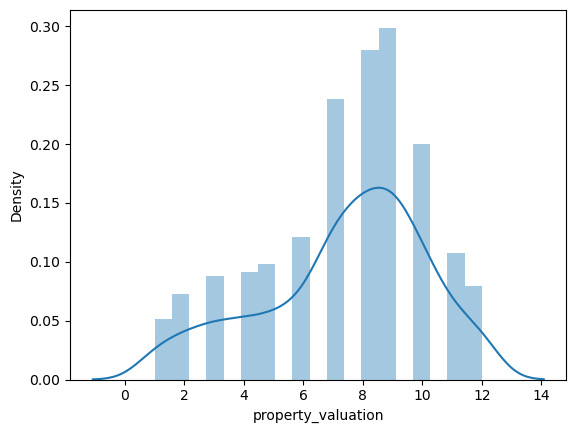

In [76]:
sns.distplot(new_custList_df.property_valuation)

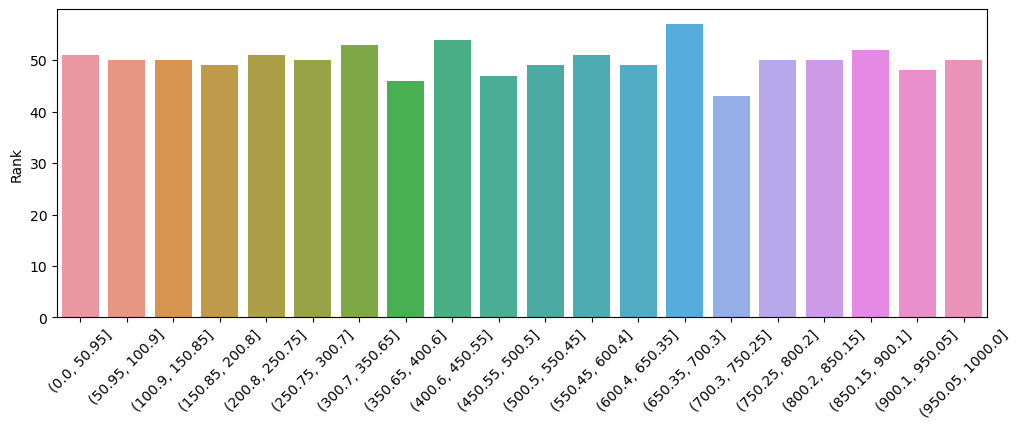

In [77]:
df=pd.DataFrame(new_custList_df.Rank.value_counts(bins=20))
df=df.sort_index()
plt.figure(figsize=(12,4))
sns.barplot(x=df.index,y=df.Rank)
plt.xticks(rotation=45);

In [78]:
new_custList_df.to_csv('NewCustomerList_cleaned.csv',index=False)